# Diseño Experimental

## Instalación de librerías

In [53]:
# pip install sinfo

## Importación librerías

In [54]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from sinfo import sinfo

## Lectura de archivos

### Lectura - Cultivos y productos de ganadería (QCL)

In [55]:
# Cultivos y productos de ganadería (QLC)
# https://www.fao.org/faostat/es/#data/QCL

df_qcl = pd.read_csv('data/qcl_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_qcl.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,ha,500.0,E,Valor estimado,NaN
1,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,100 g/ha,10400.0,E,Valor estimado,NaN
2,QCL,Cultivos y productos de ganadería,188,Costa Rica,5510,Producción,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,520.0,X,Cifra de fuentes internacionales,Cifras no oficiales
3,QCL,Cultivos y productos de ganadería,188,Costa Rica,5312,Área cosechada,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,ha,700.0,E,Valor estimado,NaN
4,QCL,Cultivos y productos de ganadería,188,Costa Rica,5419,Rendimiento,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,100 g/ha,10357.0,E,Valor estimado,NaN


### Lectura - Cultivos y productos de ganadería (TLC)


In [56]:
# Cultivos y productos de ganadería (TLC)
# https://www.fao.org/faostat/es/#data/TCL

df_tlc = pd.read_csv('data/tlc_cultivos-y-productos-de-ganadería.csv', low_memory=False)

df_tlc.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código del producto (CPC),Producto,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo,Nota
0,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,toneladas,87.0,A,Cifra oficial,NaN
1,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1961,1961,1000 US$,20.0,A,Cifra oficial,NaN
2,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,toneladas,182.0,A,Cifra oficial,NaN
3,TCL,Cultivos y productos de ganadería,188,Costa Rica,5922,Exportaciones Valor,01929.07,"Abaca, cañamo de manila en bruto",1962,1962,1000 US$,42.0,A,Cifra oficial,NaN
4,TCL,Cultivos y productos de ganadería,188,Costa Rica,5910,Exportaciones - Canditad,01929.07,"Abaca, cañamo de manila en bruto",1963,1963,toneladas,35.0,A,Cifra oficial,NaN


### Lectura - Uso de la tierra (RL)

In [57]:
# Uso de la tierra
# https://www.fao.org/faostat/es/#data/RL

df_rl = pd.read_csv('data/rl_uso-de-la-tierra.csv', low_memory=False)

df_rl.head()



tipos = df_rl['Elemento'].unique()

print(tipos)

['Superficie' 'Proporción de superficie de tierra'
 'Proporción de tierras agrícolas' 'Superficie per cápita'
 'Existencias de carbono en la biomasa viva'
 'Proporción de tierras destinadas a bosques'
 'Proporción de tierras de cultivo']


### Lectura - Variación de temperatura de la superficie terrestre (ET)

In [58]:
# Variación de temperatura de la superficie terrestre
# https://www.fao.org/faostat/es/#data/ET

df_et = pd.read_csv('data/et_variación-de-temperatura-de-la-superficie-terrestre.csv', low_memory=False)

df_et.head()

,Código del ámbito,Ámbito,Código del área (M49),Área,Código del elemento,Elemento,Código Meses,Meses,Código del año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1961,1961,°C,0.866,E,Valor estimado
1,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1962,1962,°C,-0.322,E,Valor estimado
2,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1963,1963,°C,-0.411,E,Valor estimado
3,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1964,1964,°C,0.800,E,Valor estimado
4,ET,Variación de temperatura de la superficie terr...,188,Costa Rica,7271,Variación de temperatura,7001,Enero,1965,1965,°C,0.011,E,Valor estimado


### Lectura - Indicadores de precipitaciones a nivel subnacional (rainfall)

In [59]:
# Indicadores de precipitaciones a nivel subnacional
# https://data.humdata.org/dataset/cri-rainfall-subnational

df_rainfall = pd.read_csv('data/cri-rainfall-adm2-full.csv', low_memory=False)

df_rainfall.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,14508,CR406,1.0,29.0,34.6333,NaN,NaN,NaN,NaN,85.7864,NaN,NaN,final
2,1981-01-11,14508,CR406,1.0,27.0,26.1,NaN,NaN,NaN,NaN,102.8939,NaN,NaN,final
3,1981-01-21,14508,CR406,1.0,18.0,24.1667,74.0,84.9,NaN,NaN,78.8571,88.5142,NaN,final
4,1981-02-01,14508,CR406,1.0,17.0,17.7,62.0,67.9667,NaN,NaN,96.9163,92.3472,NaN,final


### Lectura - Indicadores de Precipitation Media (PR)

In [60]:
# Indicadores de precipitation media
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_pr_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_pr = pd.read_excel('data/pr_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_pr.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,38.40,72.03,149.35,6.83,188.00,342.54,587.20,417.28,...,107.73,144.08,360.60,481.42,239.83,264.82,369.99,332.68,301.97,108.55
1,CRI.61981,Alajuela,46.47,76.80,122.70,2.60,148.21,357.01,692.00,440.42,...,90.33,92.70,293.51,511.80,279.11,283.84,356.88,299.65,297.45,136.31
2,CRI.61982,Cartago,56.68,116.36,244.44,3.99,218.25,387.06,641.32,463.53,...,173.54,204.50,449.33,540.98,257.26,284.44,384.83,338.41,354.28,153.91
3,CRI.61983,Guanacaste,10.88,15.49,28.48,3.43,145.17,292.74,384.07,307.75,...,22.07,41.20,233.10,404.06,166.26,205.95,376.92,303.21,161.42,41.55
4,CRI.61984,Heredia,74.09,133.57,227.31,3.71,183.62,395.65,850.99,493.18,...,164.96,187.45,442.56,586.40,334.48,322.42,344.67,315.48,446.18,200.40


### Lectura - Indicadores de Average Mean Surface Air Temperature (TAS)        

In [61]:
# Indicadores de Average Mean Surface Air Temperature
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tas_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tas = pd.read_excel('data/tas_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tas.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,23.74,24.22,25.04,25.46,24.98,24.33,24.37,24.23,...,25.56,25.73,25.43,24.04,25.01,24.52,24.34,24.61,23.72,24.21
1,CRI.61981,Alajuela,24.54,25.15,26.20,26.75,25.85,25.03,25.09,24.93,...,26.80,27.06,26.34,24.81,25.80,25.23,25.12,25.47,24.50,25.07
2,CRI.61982,Cartago,18.16,18.31,19.07,19.56,19.75,19.56,19.50,19.54,...,19.58,19.76,20.16,19.16,20.08,19.84,19.70,19.75,18.88,18.97
3,CRI.61983,Guanacaste,26.36,27.16,27.60,27.95,27.30,26.56,26.51,26.43,...,28.20,28.31,27.78,26.42,27.30,26.72,26.60,26.96,26.31,26.92
4,CRI.61984,Heredia,23.74,24.22,25.37,25.97,25.29,24.43,24.65,24.39,...,25.97,26.25,25.79,24.17,25.31,24.69,24.52,24.84,23.72,24.28


### Lectura - Indicadores de Average Maximum Surface Air Temperature (TASMAX)

In [62]:
# Indicadores de Average Maximum Surface Air Temperature
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmax_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tasmax = pd.read_excel('data/tasmax_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tasmax.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,27.66,28.48,29.40,29.64,28.80,27.97,27.90,27.82,...,29.92,29.91,29.25,27.68,28.54,28.10,27.83,28.27,27.40,27.96
1,CRI.61981,Alajuela,28.55,29.52,30.71,31.06,29.77,28.73,28.70,28.63,...,31.30,31.38,30.26,28.51,29.41,28.93,28.69,29.22,28.31,28.92
2,CRI.61982,Cartago,22.21,22.73,23.61,23.98,23.82,23.35,23.10,23.24,...,24.12,24.18,24.23,22.96,23.69,23.54,23.32,23.55,22.66,22.85
3,CRI.61983,Guanacaste,30.71,31.86,32.36,32.45,31.32,30.46,30.34,30.30,...,32.96,32.81,31.79,30.32,31.13,30.60,30.28,30.85,30.34,31.05
4,CRI.61984,Heredia,27.47,28.31,29.59,30.04,29.04,27.94,28.07,27.90,...,30.18,30.32,29.54,27.68,28.72,28.20,27.93,28.45,27.29,27.88


### Lectura - Indicadores de Average Minimum Surface Air Temperature (TASMIN)

In [63]:
# Indicadores de Average Minimum Surface Air Temperature
# https://cckpapi.worldbank.org/cckp/v1/cru-x0.5_timeseries_tasmin_timeseries_monthly_1901-2022_mean_historical_cru_ts4.07_mean/CRI,CRI.61981,CRI.61982,CRI.61983,CRI.61984,CRI.61985,CRI.61986,CRI.61987?_format=json

df_tasmin = pd.read_excel('data/tasmax_timeseries_monthly_1901-2022_mean_historical.xlsx', sheet_name='all')
df_tasmin.head()

,code,name,1901-01,1901-02,1901-03,1901-04,1901-05,1901-06,1901-07,1901-08,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,CRI,Costa Rica,27.66,28.48,29.40,29.64,28.80,27.97,27.90,27.82,...,29.92,29.91,29.25,27.68,28.54,28.10,27.83,28.27,27.40,27.96
1,CRI.61981,Alajuela,28.55,29.52,30.71,31.06,29.77,28.73,28.70,28.63,...,31.30,31.38,30.26,28.51,29.41,28.93,28.69,29.22,28.31,28.92
2,CRI.61982,Cartago,22.21,22.73,23.61,23.98,23.82,23.35,23.10,23.24,...,24.12,24.18,24.23,22.96,23.69,23.54,23.32,23.55,22.66,22.85
3,CRI.61983,Guanacaste,30.71,31.86,32.36,32.45,31.32,30.46,30.34,30.30,...,32.96,32.81,31.79,30.32,31.13,30.60,30.28,30.85,30.34,31.05
4,CRI.61984,Heredia,27.47,28.31,29.59,30.04,29.04,27.94,28.07,27.90,...,30.18,30.32,29.54,27.68,28.72,28.20,27.93,28.45,27.29,27.88


## Graficos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None
Kursotis: 0.05524614843093856
Skewness: 0.032122514283202334
Estadístico = 0.19896549779904893, p-value = 0.9053055672511008
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
ma

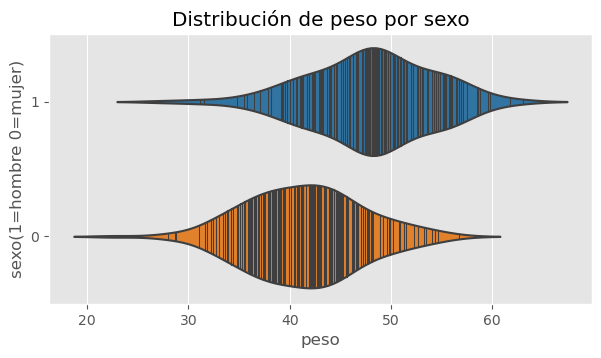

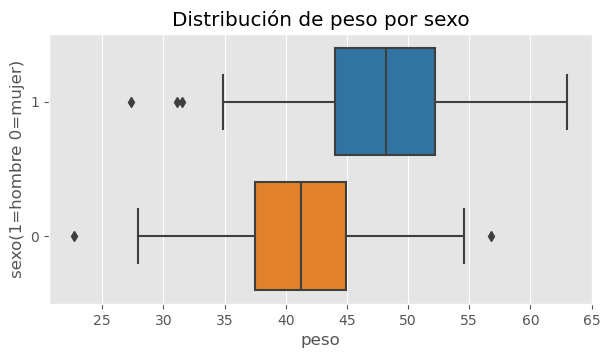

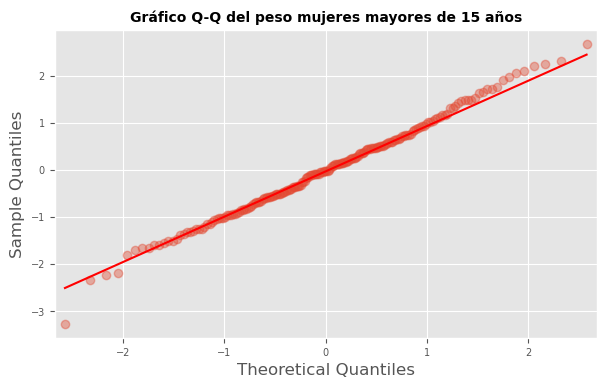

In [64]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)


datos['male'] = datos['male'].astype(str)
datos = datos[(datos.age > 15)]
peso_hombres = datos.loc[datos.male == '1', 'weight']
peso_mujeres = datos.loc[datos.male == '0', 'weight']

# Grafico violinplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'weight',
    y       = 'male',
    data    = datos,
    palette = 'tab10',
    inner   = 'stick',
    ax      = ax
)
ax.set_title('Distribución de peso por sexo')
ax.set_xlabel('peso')
ax.set_ylabel('sexo(1=hombre 0=mujer)');

# Grafico boxplot
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.boxplot(
    x       = 'weight',
    y       = 'male',
    data    = datos,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribución de peso por sexo')
ax.set_xlabel('peso')
ax.set_ylabel('sexo(1=hombre 0=mujer)');
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    peso,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del peso mujeres mayores de 15 años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
print('Kursotis:', stats.kurtosis(peso))
print('Skewness:', stats.skew(peso))
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(peso)
shapiro_test
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

from sinfo import sinfo
sinfo()